<a href="https://colab.research.google.com/github/vekoada/tensorflow-course/blob/main/02_neural_network_classification_worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This is a multi-class classification problem

In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

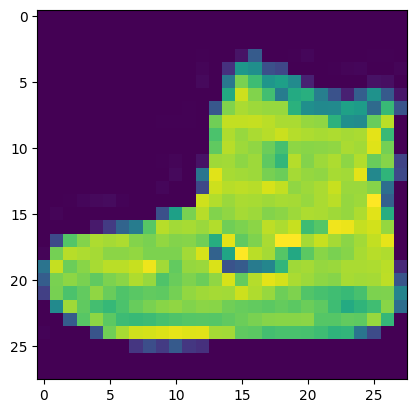

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
#Create list index for labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

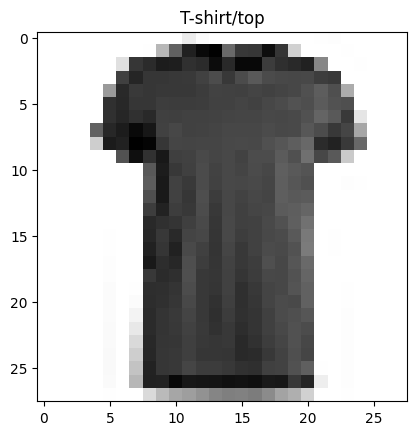

In [ ]:
#Plotting an image
index = 17
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

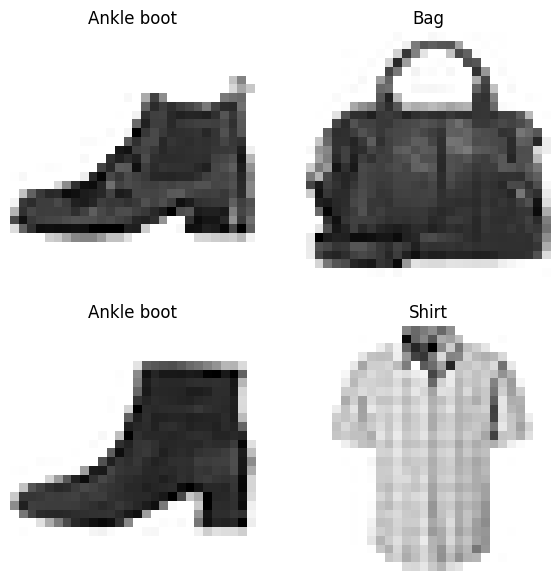

In [ ]:
#Plotting a few random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
#Building our model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Use sparse for integers, not sparse for one-hot
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history_1 = model_1.fit(train_data, train_labels, epochs=100, validation_data=(test_data, test_labels), callbacks=[early_stop], verbose=0)


In [ ]:
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.9290 - accuracy: 0.6350


[0.9289705157279968, 0.6349999904632568]

Text(0.5, 0, 'epochs')

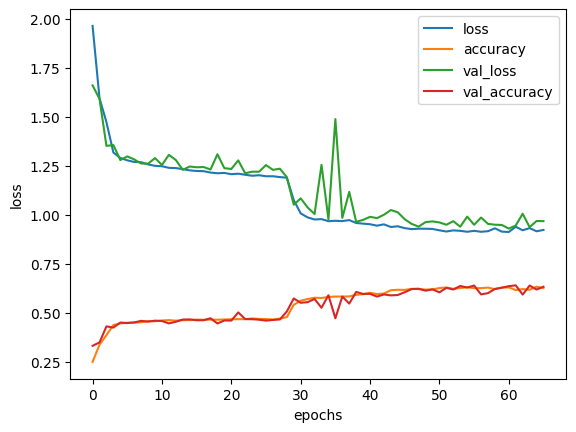

In [ ]:
#Plot the history
import pandas as pd
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#Neural networks prefer scaled/normalized values
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()
#Check
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#Building our model with normalized data
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Use sparse for integers, not sparse for one-hot
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history_2 = model_2.fit(train_data_norm, train_labels, epochs=100, validation_data=(test_data_norm, test_labels), callbacks=[early_stop], verbose=0)


In [ ]:
model_2.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4700 - accuracy: 0.8473


[0.4700062572956085, 0.8472999930381775]

Text(0.5, 0, 'epochs')

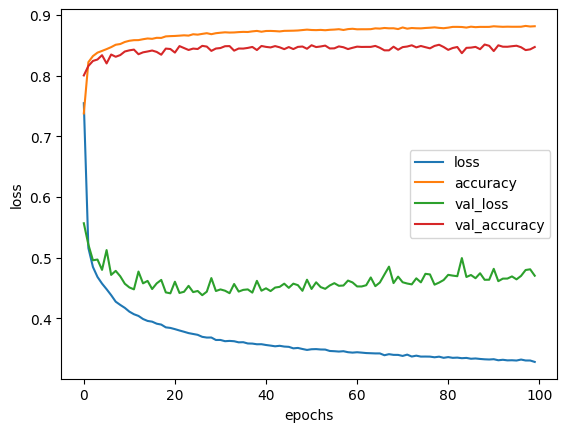

In [ ]:
#Plot the history
import pandas as pd
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#Finding the ideal learning rate:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Create the learning scheduler so we can plot loss vs learning rate
lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs=40,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lrs],
                        verbose=0)

Text(0.5, 1.0, 'Finding optimal learning rate')

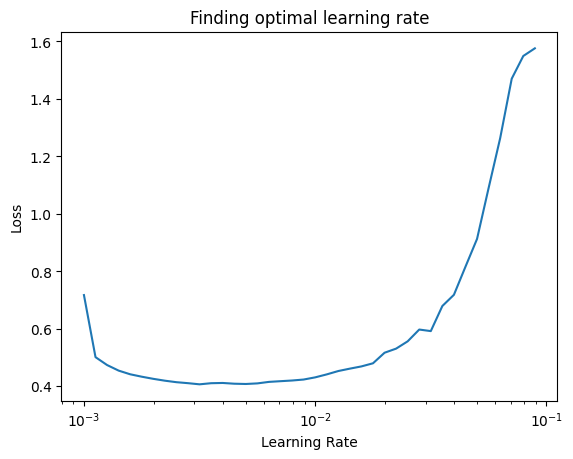

In [ ]:
lr_s = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lr_s, history_3.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding optimal learning rate')

In [ ]:
#Create a model with the ideal learning rate
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_norm,
                        train_labels,
                        epochs=200,
                        validation_data = (test_data_norm, test_labels),
                        callbacks=[es])

Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6393 - accuracy: 0.7741 - val_loss: 0.5095 - val_accuracy: 0.8211
Epoch 2/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4741 - accuracy: 0.8365 - val_loss: 0.4837 - val_accuracy: 0.8348
Epoch 3/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4464 - accuracy: 0.8450 - val_loss: 0.4627 - val_accuracy: 0.8403
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4295 - accuracy: 0.8500 - val_loss: 0.4464 - val_accuracy: 0.8416
Epoch 5/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4218 - accuracy: 0.8519 - val_loss: 0.4597 - val_accuracy: 0.8375
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4147 - accuracy: 0.8534 - val_loss: 0.4508 - val_accuracy: 0.8436
Epoch 7/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4099 - accuracy: 0.8545 - val_loss: 0.4664 - val_ac

Text(0.5, 0, 'Epochs')

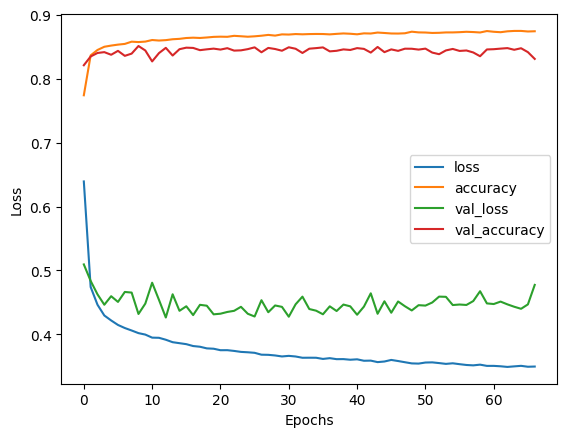

In [ ]:
#Graphing the history
pd.DataFrame(history_4.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
model_4.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4470 - accuracy: 0.8479


[0.44696229696273804, 0.8478999733924866]

In [ ]:
#Creating our confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def create_confusion(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalizing
  n_classes = cm.shape[0]

  #visuals
  fig, ax = plt.subplots(figsize=figsize)

  #plot
  cax=ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Classes
  if classes!=None:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #Label axes
  ax.set(title='CM',
        xlabel='Pred Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Threshold for colors
  threshold = (cm.max() + cm.min()) / 2.

  #Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment='center',
    color='white' if cm[i, j] > threshold else 'black',
    size=text_size)

In [ ]:
#Make predictions
y_probs = model_4.predict(test_data_norm) #probabilities - remember: must use same kind of data that model was trained on
class_names[tf.argmax(y_probs[0])]

313/313 [==============================] - 1s 2ms/step


'Ankle boot'

In [ ]:
#Convert probs into integers
y_preds = y_probs.argmax(axis=1)

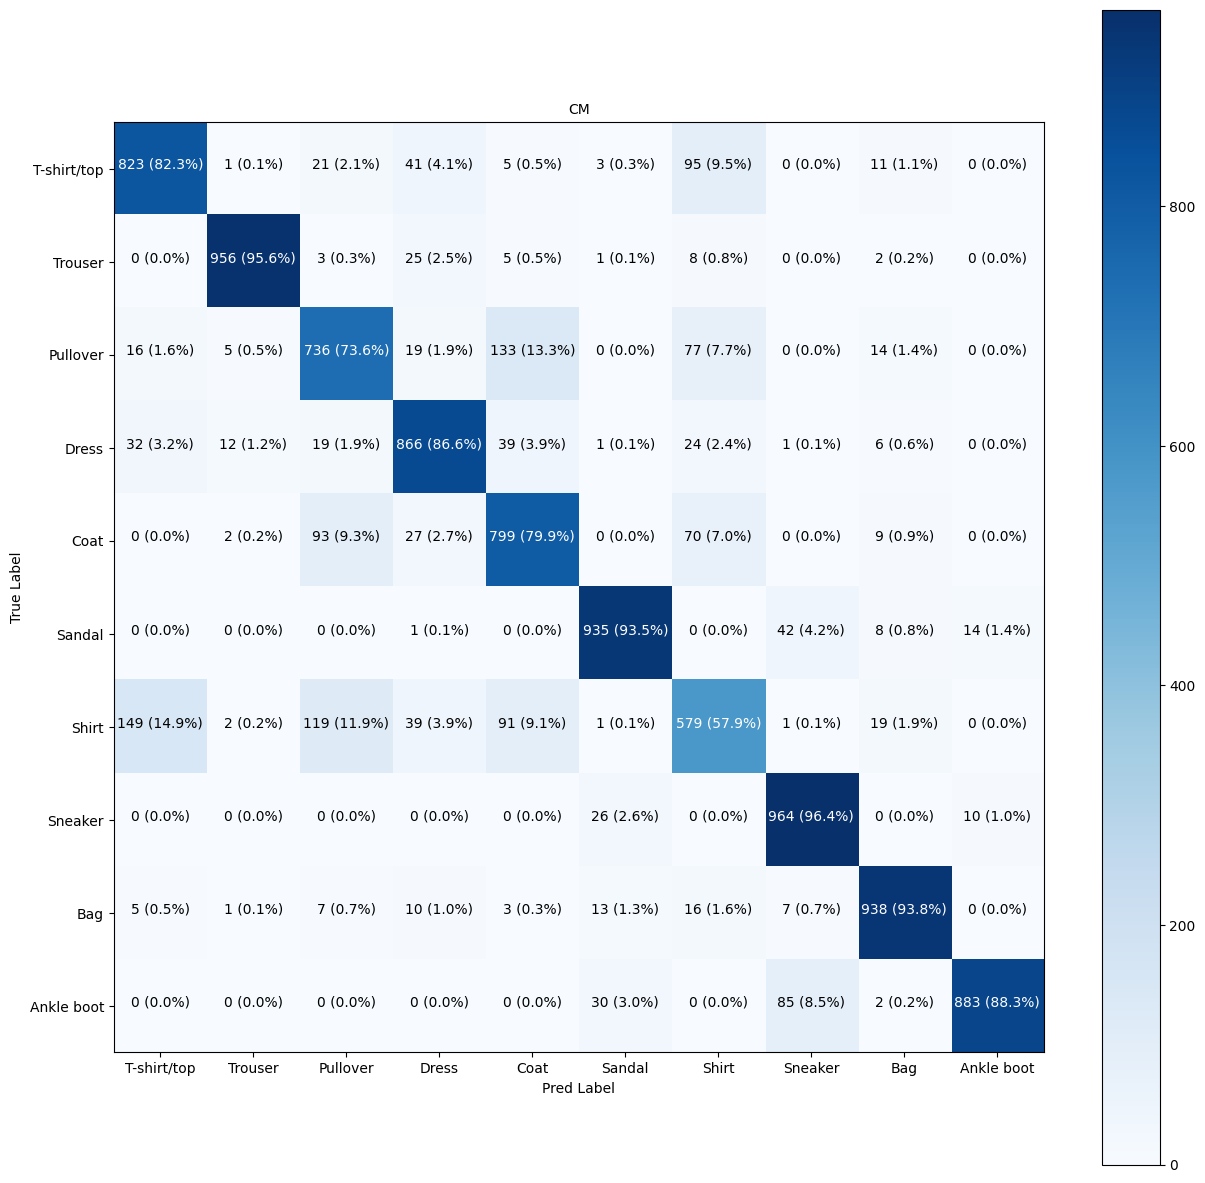

In [ ]:
create_confusion(test_labels, y_preds, classes=class_names, figsize=(15, 15), text_size=10)

In [ ]:
import random
def plt_rand_img(model, images, true_labels, classes):
  """
  Picks a random image and plots with a prediction label and truth label
  """
  # Set up a random int
  i = random.randint(0, len(images))

  #Create preds and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot
  plt.imshow(target_image, cmap=plt.cm.binary)

  #Change the color of titles depending on correctness
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  #Label x-axis
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label), color=color)

1/1 [==============================] - 0s 34ms/step


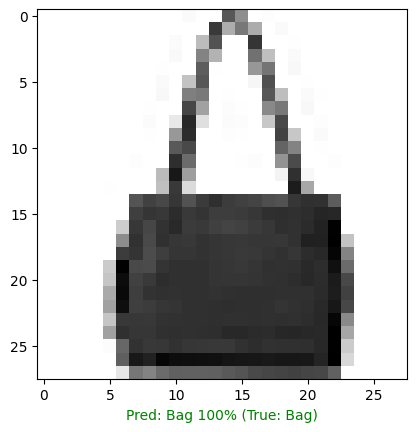

In [ ]:
plt_rand_img(model=model_4,
             images=test_data_norm,
             true_labels=test_labels,
             classes=class_names)

In [ ]:
model_4.layers

In [ ]:
weights, biases = model_4.layers[1].get_weights()
weights.shape, biases.shape

((784, 8), (8,))

In [ ]:
weights, biases

(array([[-1.7533654 ,  0.74015594,  3.178506  , ...,  1.019629  ,
         -1.8154094 , -4.621408  ],
        [ 1.2227452 ,  4.355603  , -2.0239532 , ...,  0.1773781 ,
          1.5016214 , -5.702708  ],
        [ 3.3996656 , -1.3539649 , -0.5447469 , ...,  1.7648183 ,
          6.1420074 , -5.873574  ],
        ...,
        [ 0.37885493, -1.494586  , -0.7168934 , ...,  0.09262933,
         -0.73787373,  0.12552372],
        [-3.0036724 , -1.0261494 ,  1.8327687 , ...,  0.935558  ,
         -1.0392463 ,  1.2741603 ],
        [ 0.16101006,  3.1791625 ,  0.21954226, ..., -0.348289  ,
          1.6977278 , -0.18838459]], dtype=float32),
 array([ 1.2793505 ,  0.82731223, -1.0189528 ,  1.0551487 , -0.02839871,
        -0.37284338,  0.37219018,  1.670703  ], dtype=float32))

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


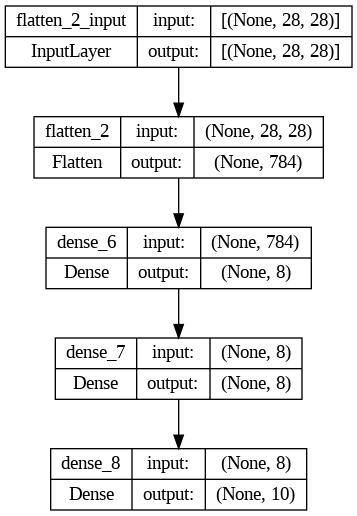

In [ ]:
tf.keras.utils.plot_model(model_4, show_shapes=True)